<a href="https://colab.research.google.com/github/piaris/projectmanager/blob/main/%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%EC%A1%B0%EC%9D%80%EB%B3%84_%EC%86%8C%EC%95%84%EA%B3%BC_%ED%98%84%ED%99%A9%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 주제 선정 [소아과 붕괴 - 얼마나 가까이 왔을까]
### 출산 전에는 심각하게 생각하지 못한 소아과 붕괴라는 이슈와 말로만 듣던 오픈런을 직접 경험하면서 소아과 의원 현황과 폐업추이는 어떨지 궁금해짐
### 특히 한국은 지역간 불평등이 심하기 때문에 지방의 인력난은 심할 것이라 생각해서 직접 눈으로 확인해보고 싶음





---



## 2. 데이터 수집하기
### - KOSIS 국가통계포털 웹 사이트에서 공공데이터 다운로드
https://kosis.kr/statHtml/statHtml.do?orgId=354&tblId=DT_HIRA4G
### - 수집된 데이터:
####1) 시군구별 표시과목별 의원 현황
####2) 시군구별 의료인력현황(간호사 및 기타인원) (분기 2018 3/4~2023 1/4)
####3) 시군구별 입원실 현황 (분기 2018 3/4~2023 1/4)
####4) 시군구별 전문과목별 전문의 인력현황 (월,분기 2007.01~2023 1/4)

### [사전준비] 라이브러리/한글 폰트 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
### (코랩) 한글 폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and direc

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 3.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [4]:
df_child = pd.read_csv('/content/sample_data/시군구별_표시과목별_의원_현황_child.csv', encoding = 'cp949')
df_total = pd.read_csv('/content/sample_data/시군구별_표시과목별_의원_현황_total.csv', encoding = 'cp949')
df_child.head()

,시군구별(1),2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,2015.4/4,2016.1/4,...,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4
0,시군구별(1),소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,...,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과
1,전체,2201,2201,2206,2214,2207,2207,2213,2202,2218,...,2158,2141,2118,2119,2111,2104,2111,2129,2135,2147
2,서울,521,522,518,521,520,522,522,519,524,...,475,468,458,458,455,452,454,454,456,456
3,부산,157,156,158,156,153,151,153,154,153,...,128,132,133,134,132,132,137,136,135,136
4,대구,114,113,112,112,112,113,111,109,109,...,112,112,113,113,114,115,115,116,115,115


##4. 데이터 전처리하기 : 필요한 데이터만 추출하기

In [5]:
# 인덱스 새로 설정하기
df_child.set_index('시군구별(1)', drop=True, inplace=True)
df_child.head()

,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,2015.4/4,2016.1/4,2016.2/4,...,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4
시군구별(1),,,,,,,,,,,,,,,,,,,,,
시군구별(1),소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,...,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과,소아청소년과
전체,2201,2201,2206,2214,2207,2207,2213,2202,2218,2212,...,2158,2141,2118,2119,2111,2104,2111,2129,2135,2147
서울,521,522,518,521,520,522,522,519,524,524,...,475,468,458,458,455,452,454,454,456,456
부산,157,156,158,156,153,151,153,154,153,150,...,128,132,133,134,132,132,137,136,135,136
대구,114,113,112,112,112,113,111,109,109,113,...,112,112,113,113,114,115,115,116,115,115


In [7]:
# 행렬 전치하기
df = df_child.T
df.head()

시군구별(1),시군구별(1),전체,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2014.1/4,소아청소년과,2201,521,157,114,138,55,67,40,5,636,48,53,63,74,30,72,102,26
2014.2/4,소아청소년과,2201,522,156,113,137,55,67,41,6,638,48,53,64,73,30,70,101,27
2014.3/4,소아청소년과,2206,518,158,112,138,56,68,40,6,643,48,52,61,73,30,73,102,28
2014.4/4,소아청소년과,2214,521,156,112,137,57,67,40,8,646,48,51,62,73,30,74,104,28
2015.1/4,소아청소년과,2207,520,153,112,139,55,66,41,9,647,48,51,60,73,29,72,105,27


In [11]:
#필요없는 열 삭제하기
df.drop('시군구별(1)', axis = 1, inplace=True)
df.head()

시군구별(1),전체,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2014.1/4,2201,521,157,114,138,55,67,40,5,636,48,53,63,74,30,72,102,26
2014.2/4,2201,522,156,113,137,55,67,41,6,638,48,53,64,73,30,70,101,27
2014.3/4,2206,518,158,112,138,56,68,40,6,643,48,52,61,73,30,73,102,28
2014.4/4,2214,521,156,112,137,57,67,40,8,646,48,51,62,73,30,74,104,28
2015.1/4,2207,520,153,112,139,55,66,41,9,647,48,51,60,73,29,72,105,27


In [9]:
#시각화에서 계속 오류가 나서 확인해보니 모든 데이터가 문자열로 되어있어서 데이터 타입 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2014.1/4 to 2023.1/4
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시군구별(1)  37 non-null     object
 1   전체       37 non-null     object
 2   서울       37 non-null     object
 3   부산       37 non-null     object
 4   대구       37 non-null     object
 5   인천       37 non-null     object
 6   광주       37 non-null     object
 7   대전       37 non-null     object
 8   울산       37 non-null     object
 9   세종       37 non-null     object
 10  경기       37 non-null     object
 11  강원       37 non-null     object
 12  충북       37 non-null     object
 13  충남       37 non-null     object
 14  전북       37 non-null     object
 15  전남       37 non-null     object
 16  경북       37 non-null     object
 17  경남       37 non-null     object
 18  제주       37 non-null     object
dtypes: object(19)
memory usage: 6.8+ KB


In [12]:
df = df.astype(dtype='int64')

In [13]:
df = df.astype(dtype='int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2014.1/4 to 2023.1/4
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   전체      37 non-null     int64
 1   서울      37 non-null     int64
 2   부산      37 non-null     int64
 3   대구      37 non-null     int64
 4   인천      37 non-null     int64
 5   광주      37 non-null     int64
 6   대전      37 non-null     int64
 7   울산      37 non-null     int64
 8   세종      37 non-null     int64
 9   경기      37 non-null     int64
 10  강원      37 non-null     int64
 11  충북      37 non-null     int64
 12  충남      37 non-null     int64
 13  전북      37 non-null     int64
 14  전남      37 non-null     int64
 15  경북      37 non-null     int64
 16  경남      37 non-null     int64
 17  제주      37 non-null     int64
dtypes: int64(18)
memory usage: 6.5+ KB


## 5. 데이터 시각화하기
### 1) 최근 10년 서울시 소아과 현황 막대 그래프
### 2) 최근 10년 6개 시도군 소아과 현황 선 그래프

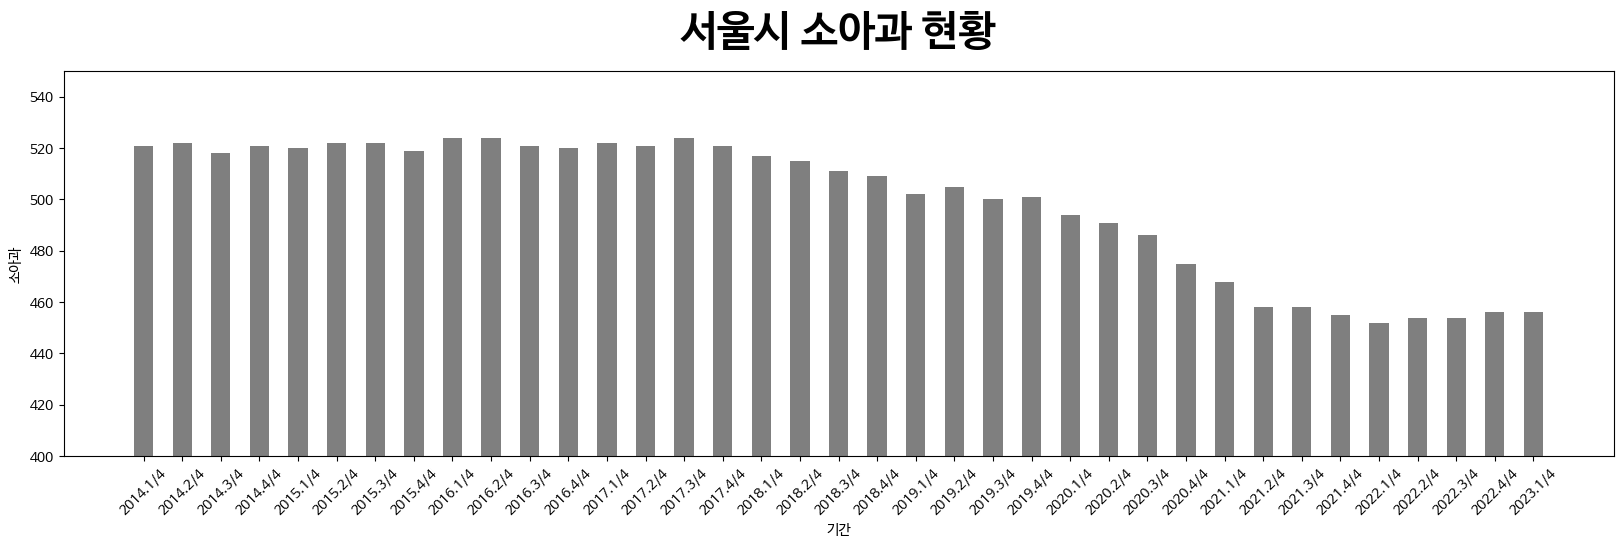

In [23]:
# 1.그래프 데이터 지정하기(X축, Y축)
x = df.index   # 기간
y = df['서울']   # 소아과

# 2.그래프 그리기
plt.figure(figsize = (20, 5))
plt.bar(x, y, color = 'black', alpha = 0.5, width = 0.5)

# 3. 그래프 꾸미기
plt.title('서울시 소아과 현황', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('기간')                    # x축 이름
plt.ylabel('소아과')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전

plt.ylim([400,550])

#plt.text()
plt.show()

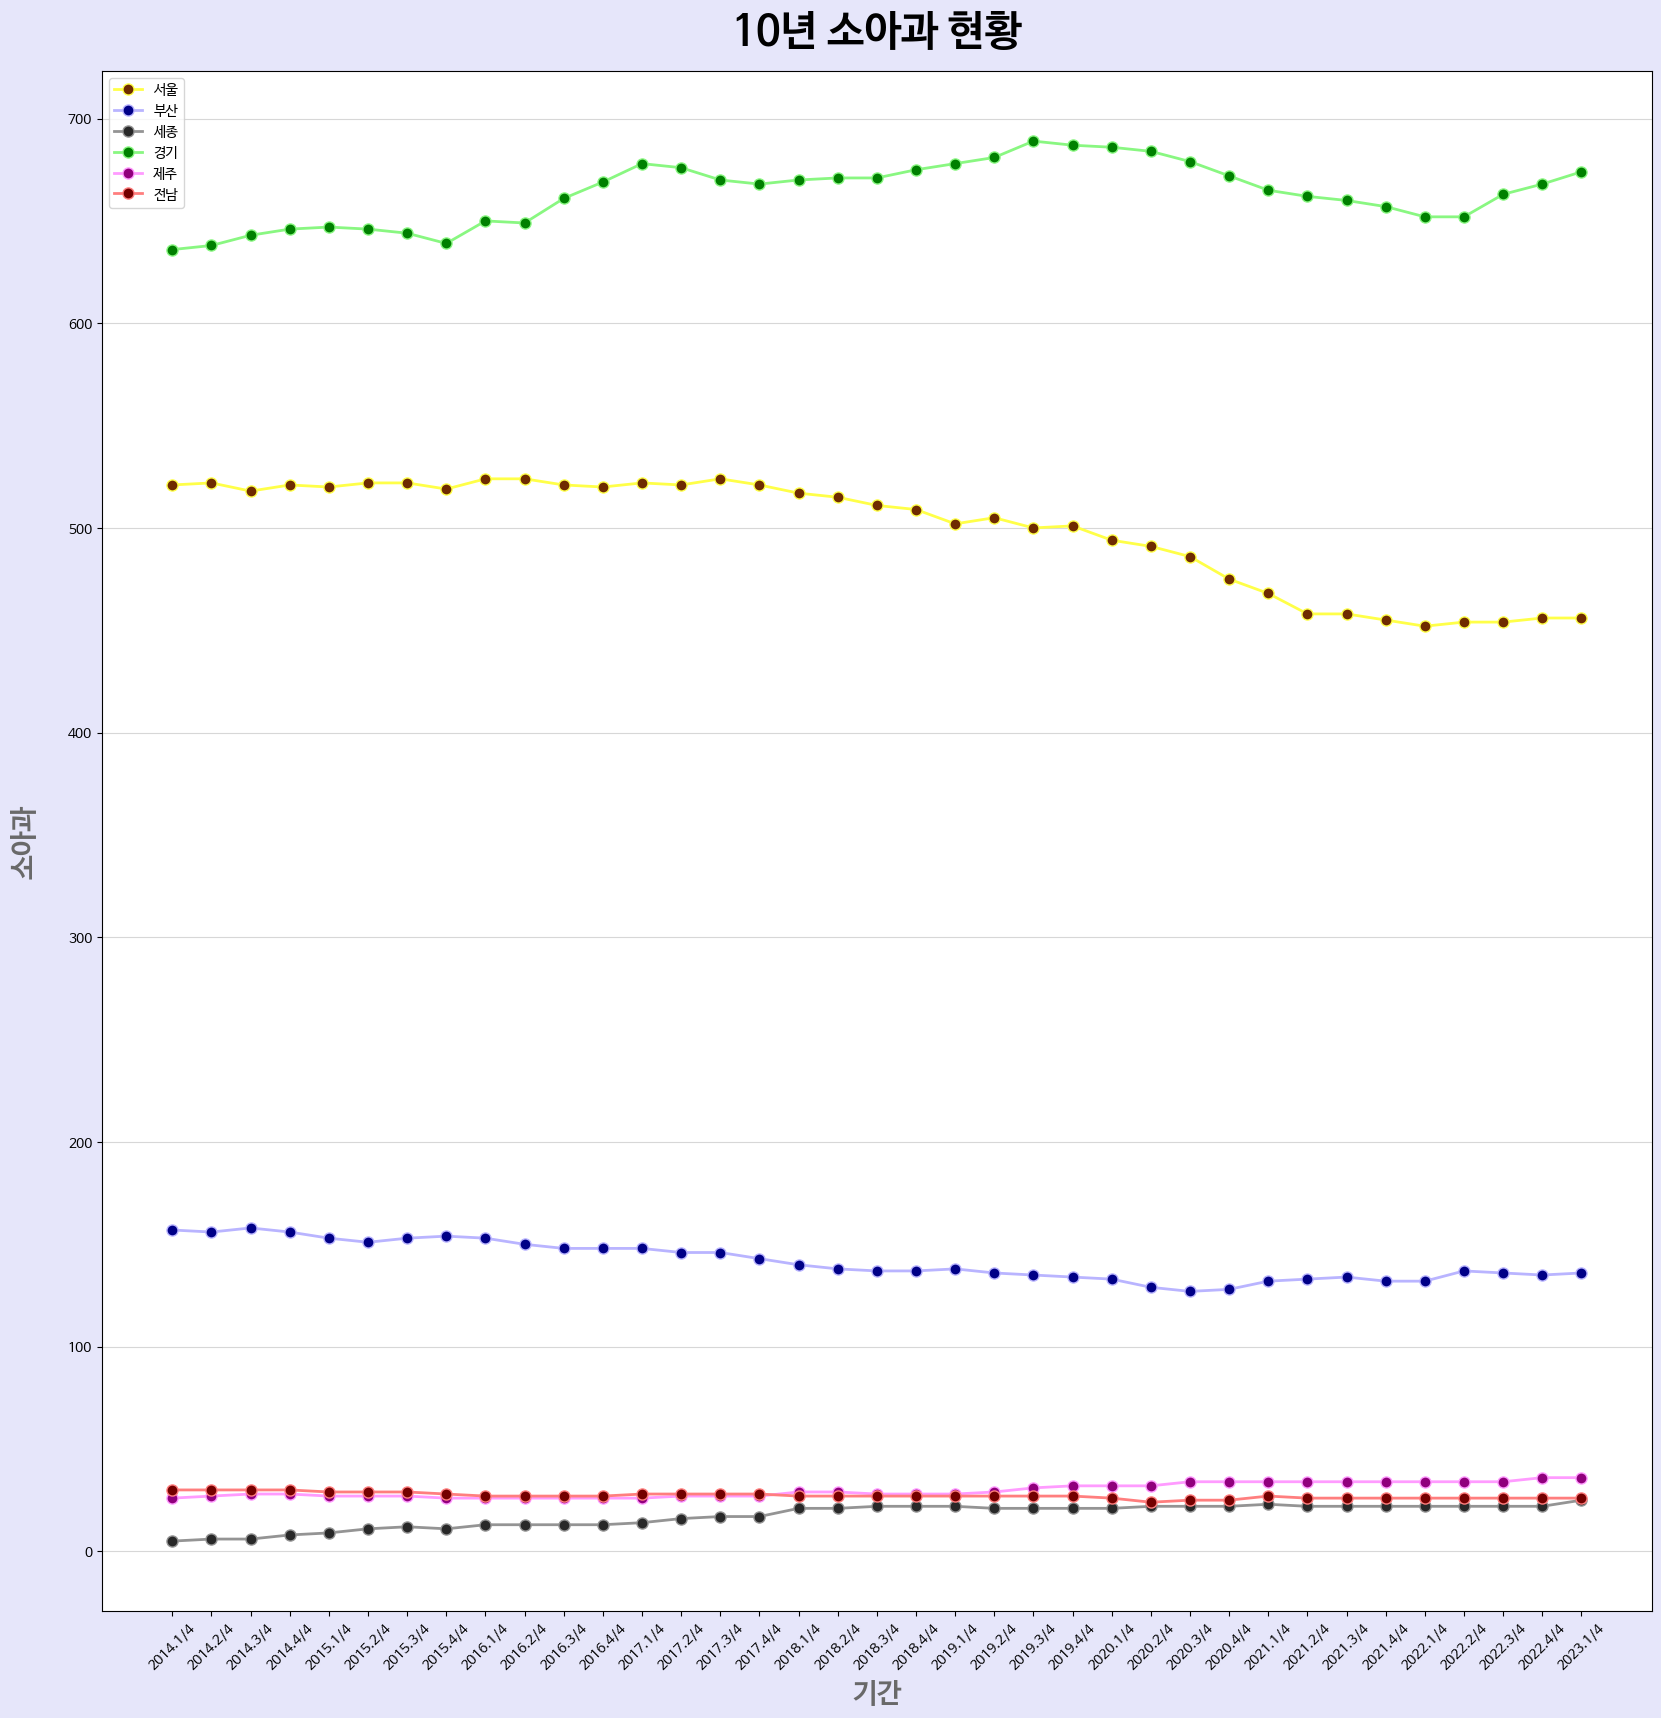

In [24]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df.index   # 기간
y1 = df['서울']   # 소아과
y2 = df['부산']
y3 = df['세종']
y4 = df['경기']
y5 = df['제주']
y6 = df['전남']

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (20, 20), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y1, color='#FFFF48', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='#6F2B00')
plt.plot(x, y2, color='#B9B4FF', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='#000087')
plt.plot(x, y3, color='#949494', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='#282828')
plt.plot(x, y4, color='#89F781', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='green')
plt.plot(x, y5, color='#FF9BFF', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='#91007D')
plt.plot(x, y6, color='#FF7E7E', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='#740000')

plt.legend(('서울','부산','세종', '경기', '제주', '전남'))

# 3. 그래프 꾸미기
plt.title('10년 소아과 현황', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('기간', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('소아과', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

## 6. 데이터 저장하기 :  파일로 저장하기

In [25]:
file = '/content/sample_data/10년_시군구별_소아과_현황.csv'
df.to_csv(file, encoding = 'cp949', mode = 'w')

---

THE END